In [3]:
%load_ext autoreload
%autoreload 2

import spikeextractors as se
import spikewidgets as sw

import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
# allow to reload module
import importlib

import basilic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
geom, recording, spike_frame_channel_array = basilic.utils.get_recording_data("../recordings/recordings_300_SqMEA-10-15um_minamp0_60s_10uV_far-neurons_bpf_25-03-2019.h5")

#geom, recording, spike_frame_channel_array = basilic.simulated_data.create_simulated_recording(3)

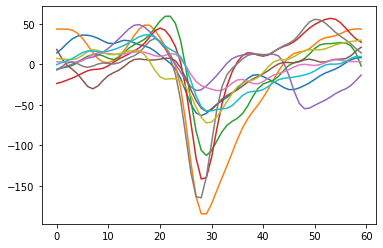

In [5]:
plt.plot()
for id in range(10, 20):
    channel = spike_frame_channel_array[id][1]
    spike_time = spike_frame_channel_array[id][0]
    waveform = recording.get_traces(channel)[0][int(spike_time-30):int(spike_time+30)]
    plt.plot(waveform)

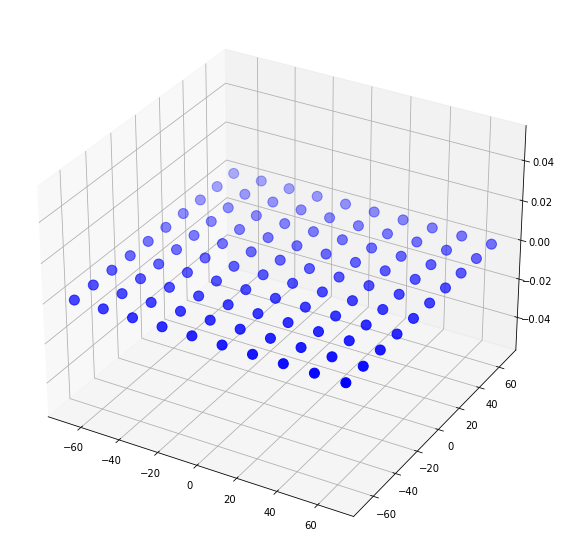

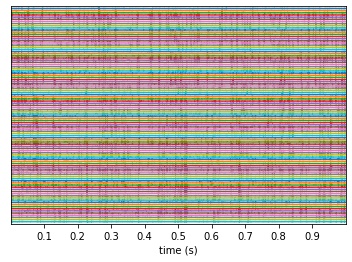

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(geom[:,0], geom[:,1], c='blue', s=100);

w_ts_geom = sw.plot_timeseries(recording, trange=[0, 1])

In [7]:
# create strucute containing added padded channels around geom
padded_channels, observed_channels = basilic.utils.make_padded_channels(geom, num_pads = 2)

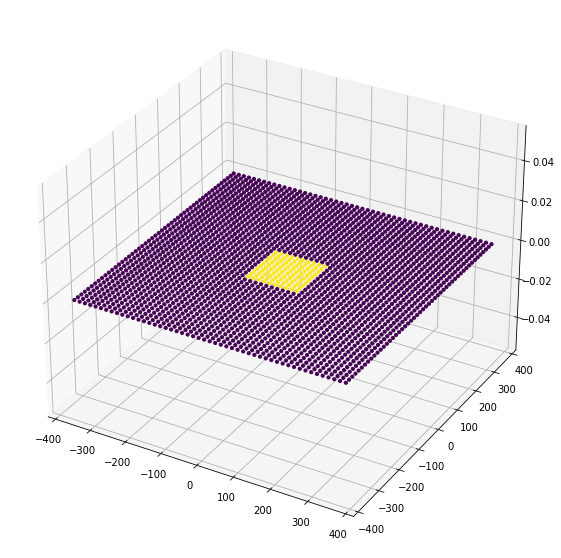

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(padded_channels[:,0], padded_channels[:,1], c=observed_channels, s=10, alpha=1);

In [9]:
neighbouring_channels = basilic.utils.get_neighbours_channels(padded_channels, observed_channels, spike_channel_radius = 40)

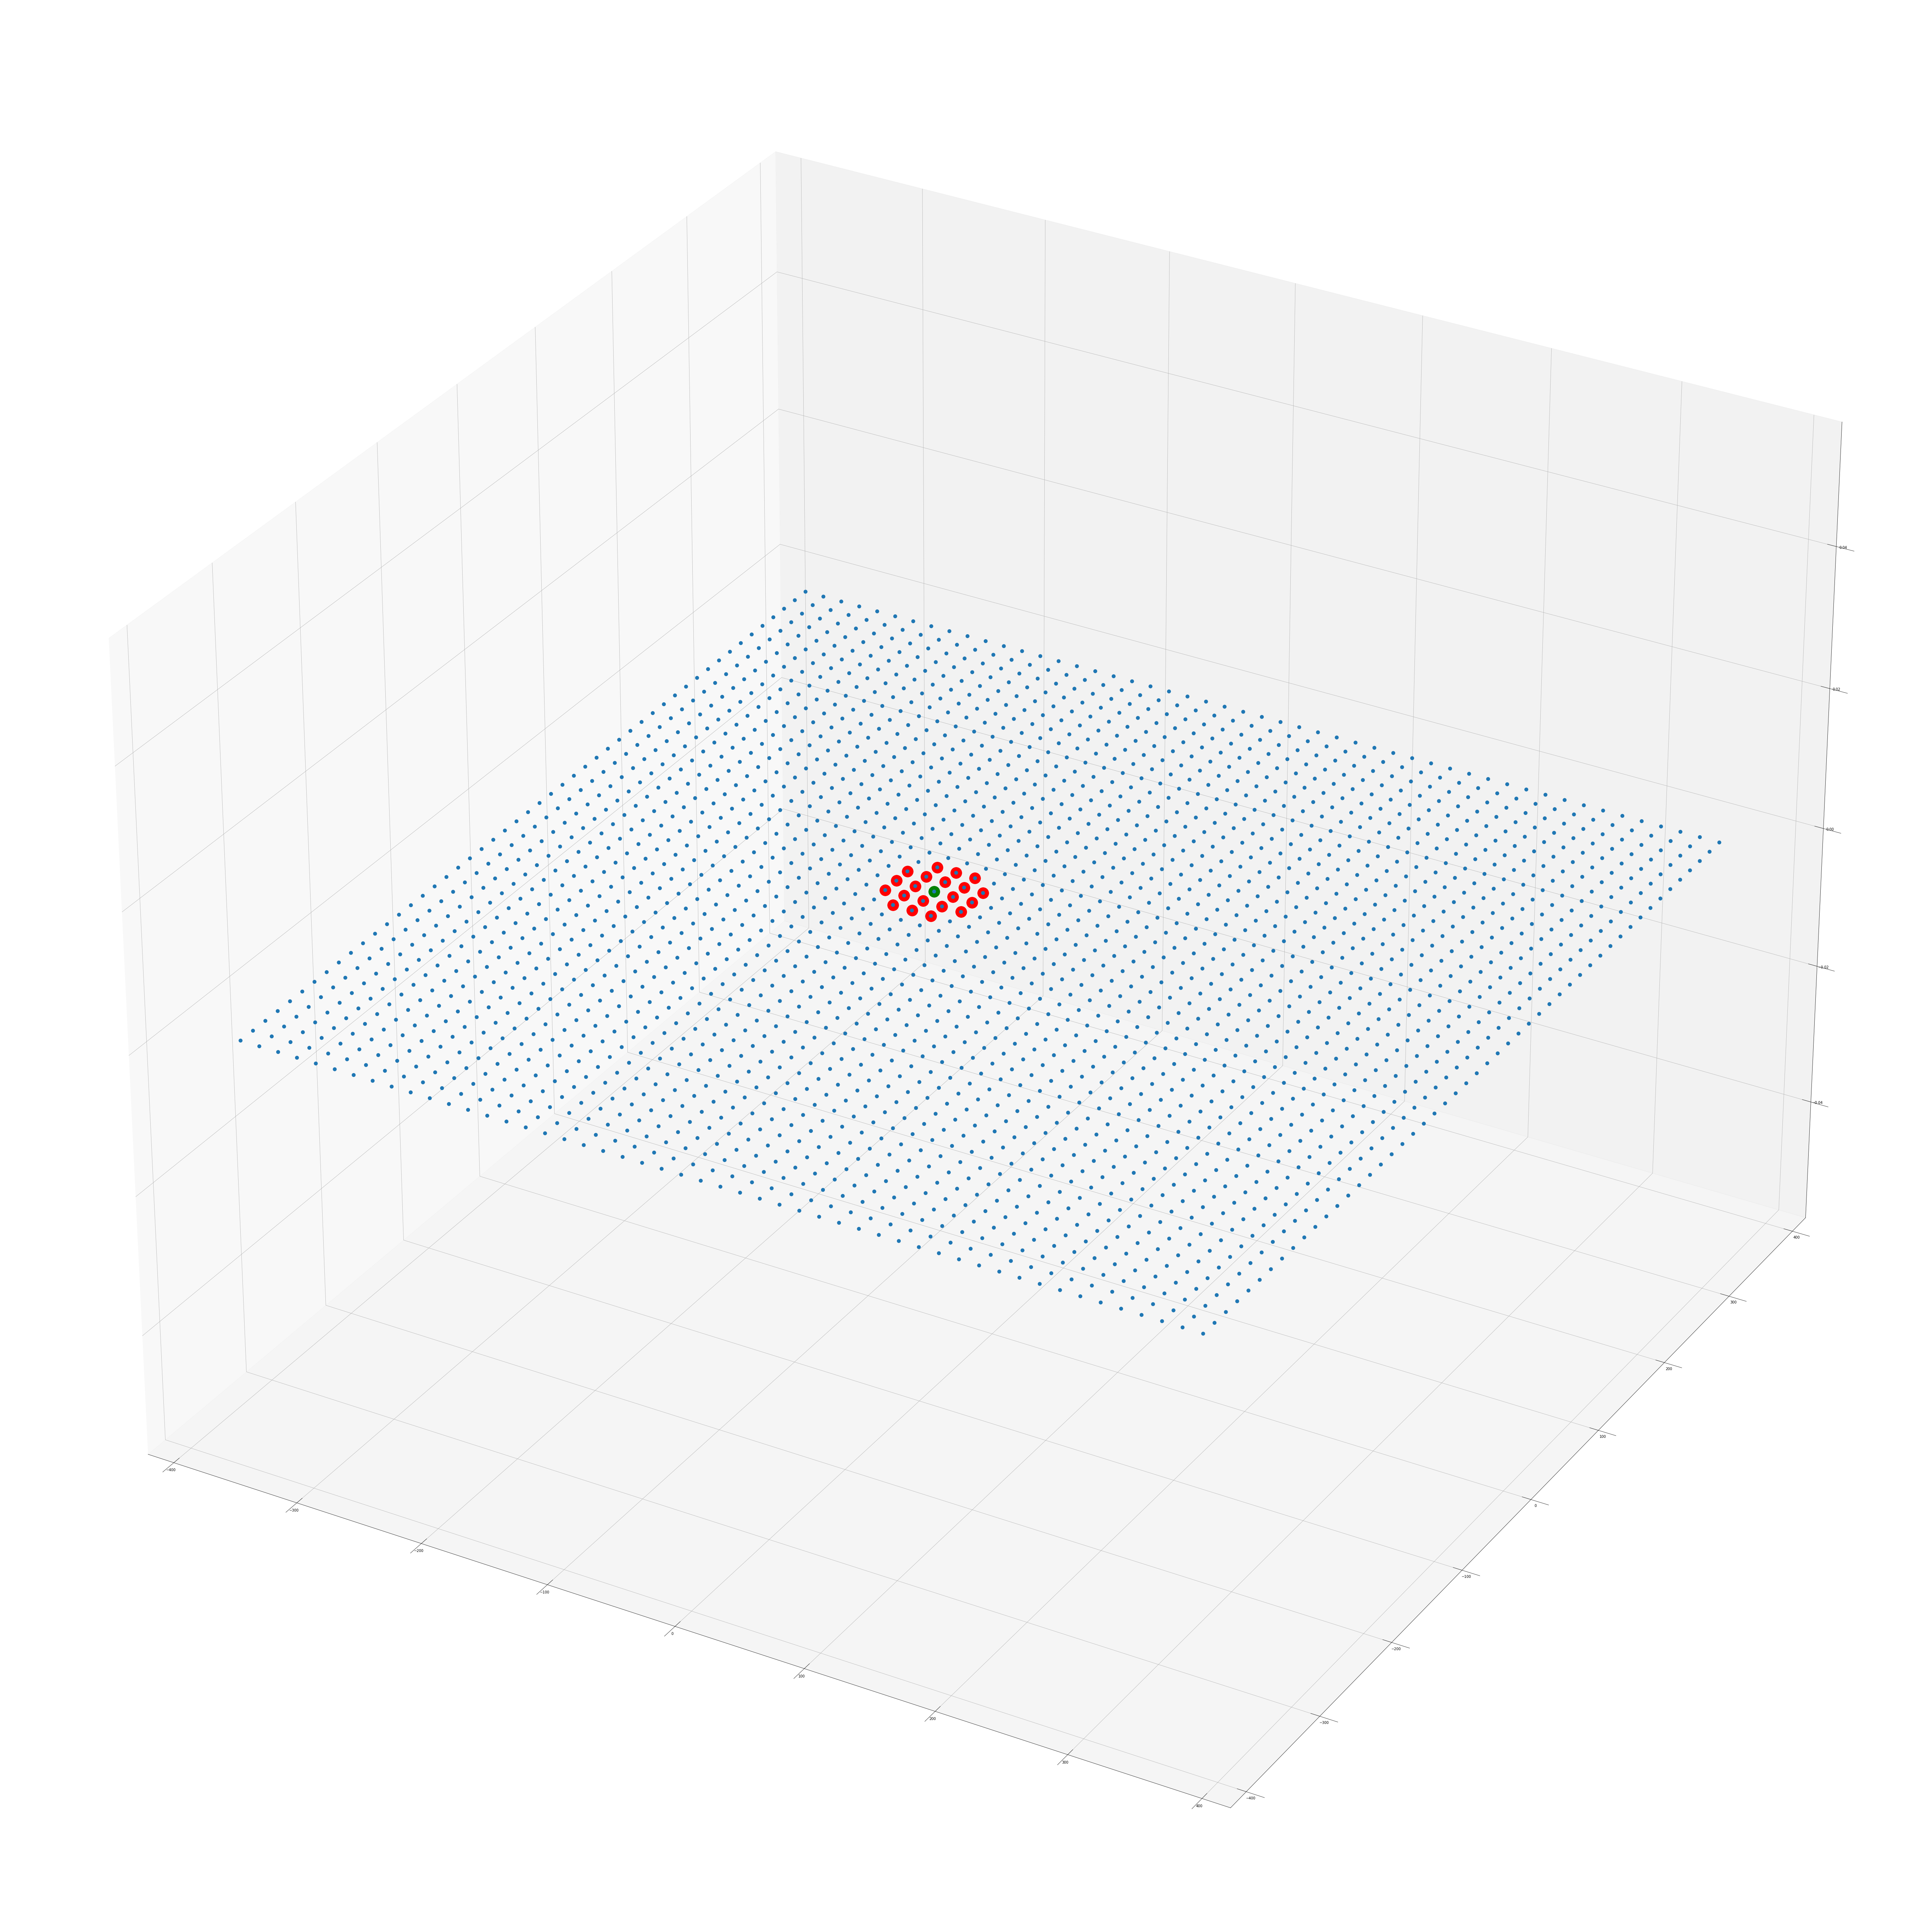

In [10]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(padded_channels[:,0], padded_channels[:,1], s=100, alpha=1);

recorded_channels_ids = [key for key in neighbouring_channels.keys()]

display_rec_channel = recorded_channels_ids[7]
for channel in neighbouring_channels[display_rec_channel]:
    ax.scatter(padded_channels[channel][0], padded_channels[channel][1], c=('g' if channel==display_rec_channel else 'r'), s=1000)

In [13]:
data_set = basilic.utils.create_save_dataset(spike_frame_channel_array, padded_channels, recorded_channels_ids, len(neighbouring_channels[0]), "300_SqMEA_VAE", len_snippet=60)

In [14]:
waveforms_list, channel_ids_list = basilic.utils.extract_and_save_waveforms(recording, spike_frame_channel_array, padded_channels, observed_channels, neighbouring_channels, data_set, save_every=500)

In [15]:
fig = plt.figure(figsize=(10,10))

for waveform in waveforms_list[0]:
       plt.plot(waveform)

IndexError: list index out of range

<Figure size 720x720 with 0 Axes>